In [1]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import imageio

In [3]:
img_rgb = imageio.imread('ab.jpg')


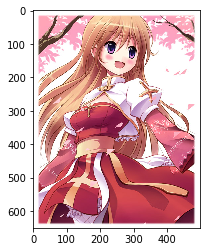

In [4]:
plt.imshow(img_rgb)

In [25]:
def show_gray(img, figsize = (8,6), title=None):
    plt.figure(figsize=figsize)
    plt.imshow(img, cmap='gray')
    if title:
        plt.title(title)
    plt.show()

In [5]:
img = imageio.imread('ab.jpg', pilmode='L')

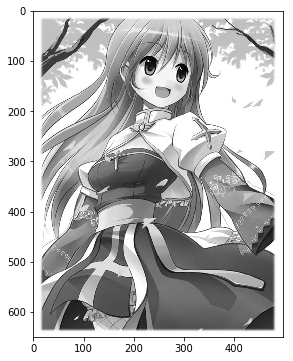

In [21]:
show_gray(img)

# Image Negative

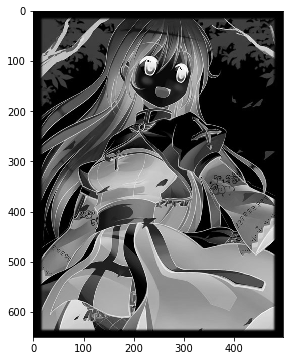

In [22]:
show_gray(255-img)

In [11]:
_img = img.copy()
_img[img == 255] = 254

In [13]:
_img

Image([[254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       ...,
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254]], dtype=uint8)

# Log-transform

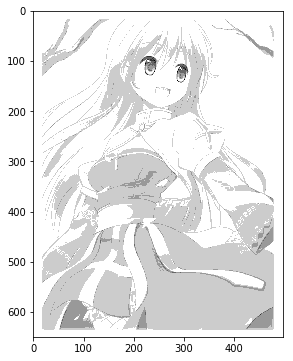

In [23]:
show_gray(np.log(1+_img).astype(np.uint8))

# Power-Law(Gamma) Transformations

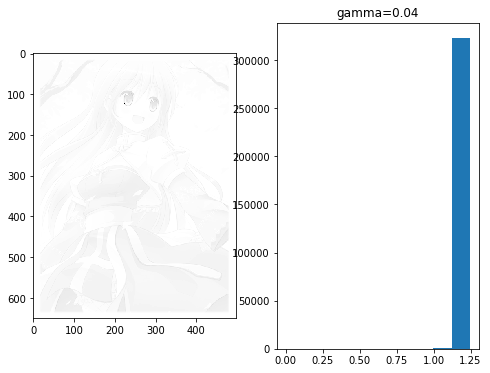

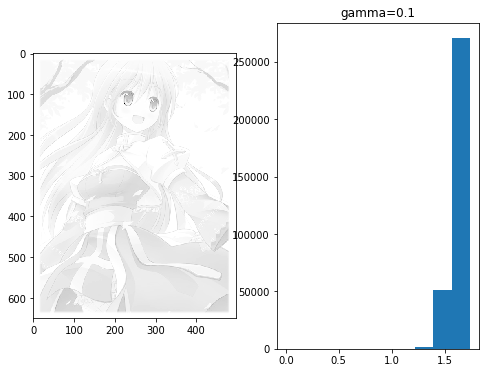

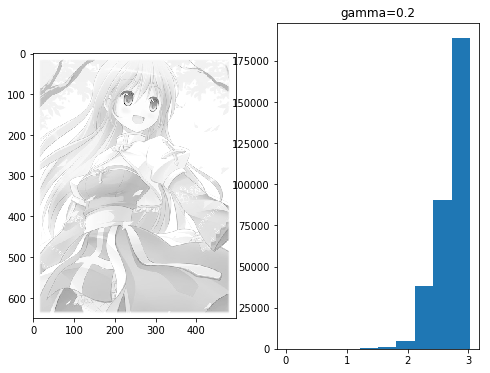

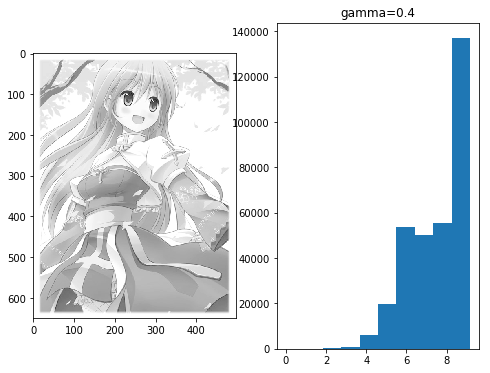

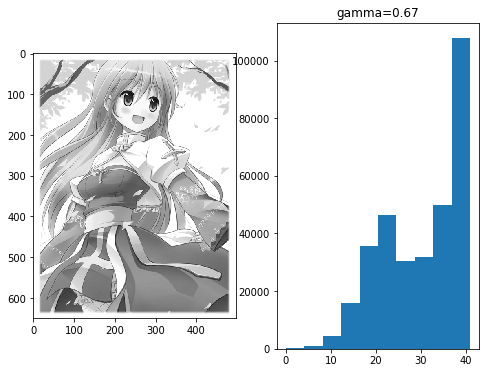

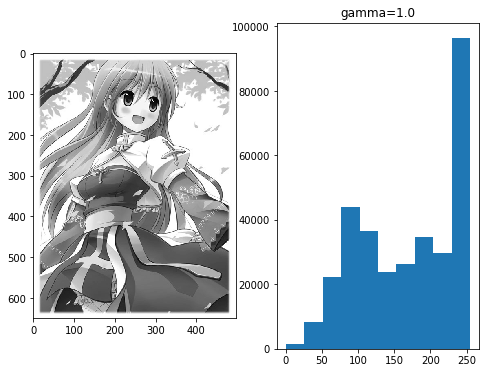

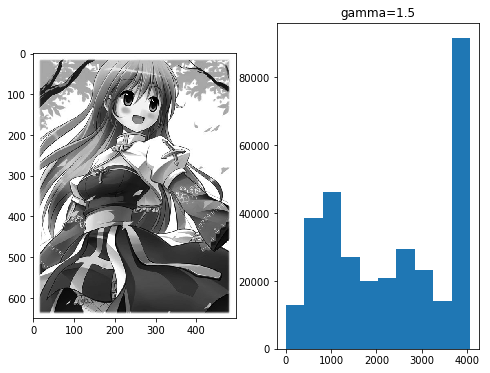

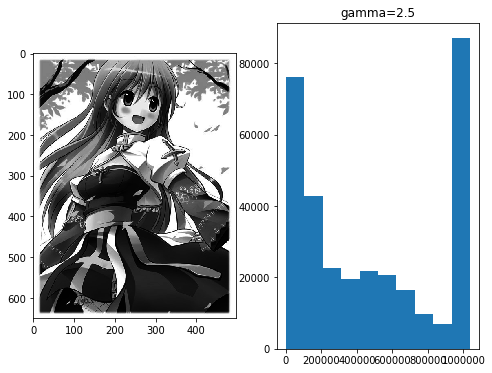

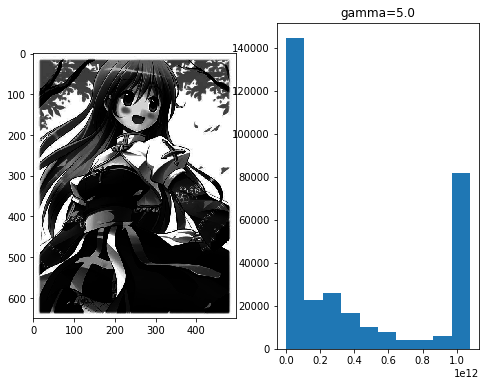

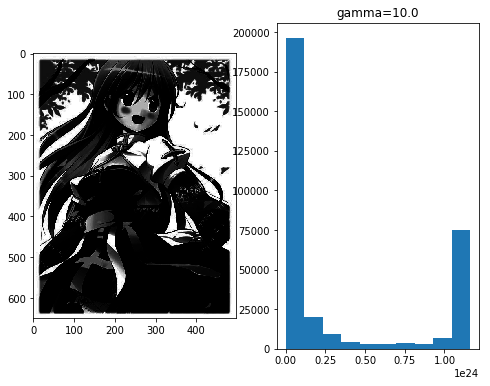

In [35]:
for gamma in [0.04,0.10,0.20,0.40,0.67,1.0,1.5,2.5,5.0,10.0]:
    #show_gray(img.astype(np.float32)**gamma, title=f'gamma={gamma}')
    simg = img.astype(np.float32)**gamma
    
    plt.figure(figsize=(8,6))
    plt.subplot(1,2,1)
    plt.imshow(simg, cmap='gray')
    
    plt.subplot(1,2,2)
    plt.hist(simg.ravel())
    
    plt.title(f'gamma={gamma}')
    plt.show()

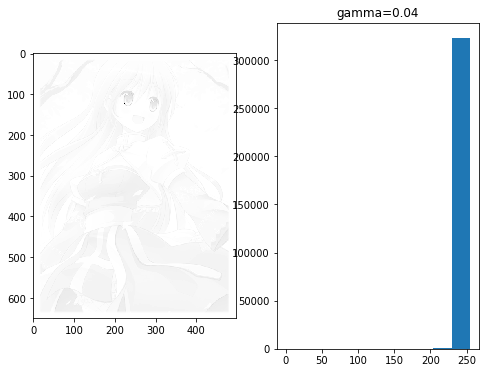

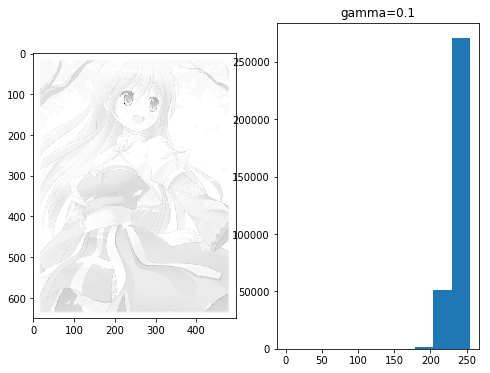

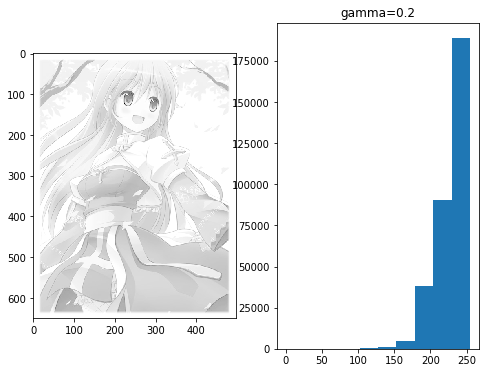

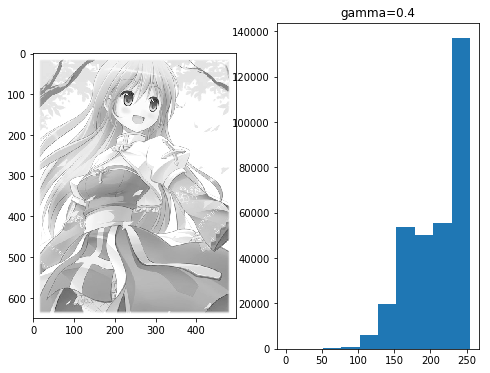

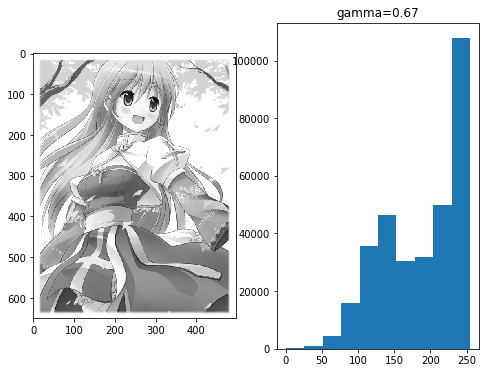

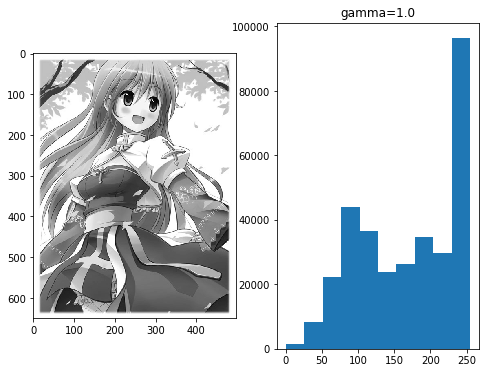

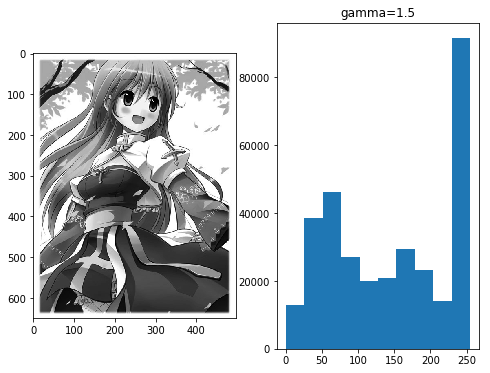

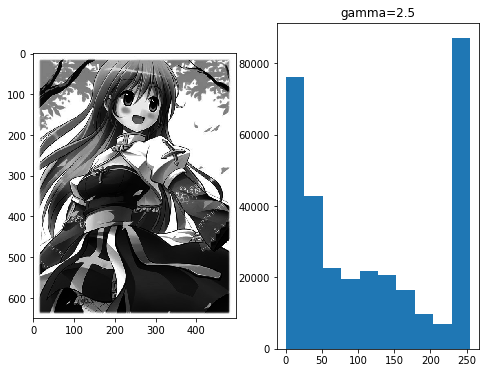

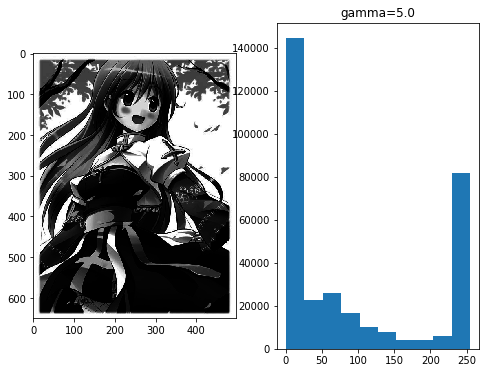

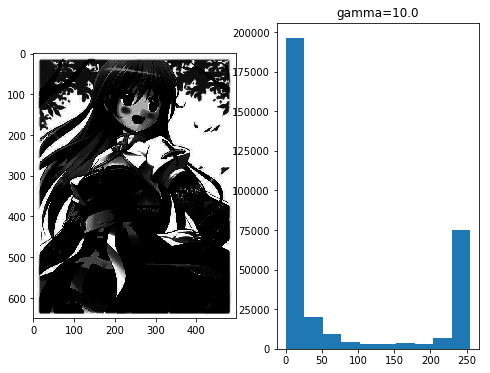

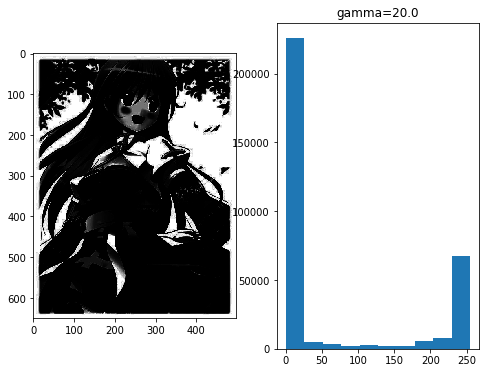

In [37]:
for gamma in [0.04,0.10,0.20,0.40,0.67,1.0,1.5,2.5,5.0,10.0,20.0]:
    #show_gray(img.astype(np.float32)**gamma, title=f'gamma={gamma}')
    simg = ((img.astype(np.float32)/255)**gamma)*255
    
    plt.figure(figsize=(8,6))
    plt.subplot(1,2,1)
    plt.imshow(simg, cmap='gray')
    
    plt.subplot(1,2,2)
    plt.hist(simg.ravel())
    
    plt.title(f'gamma={gamma}')
    plt.show()

# Bit-plane slicing

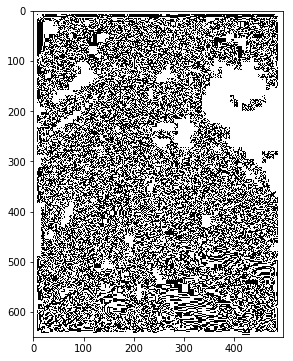

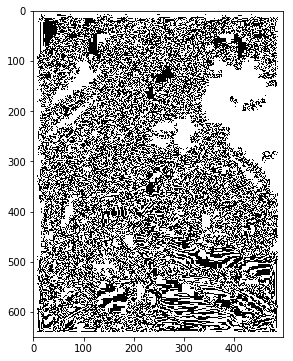

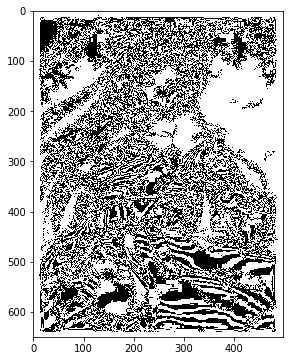

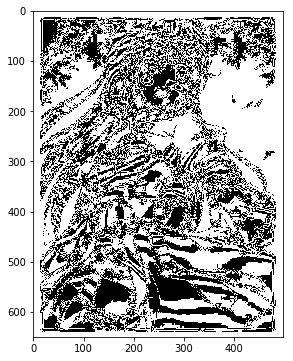

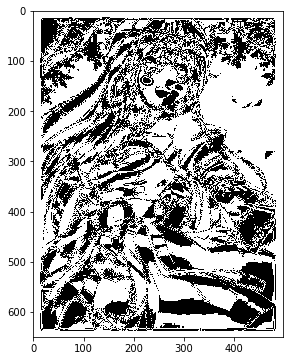

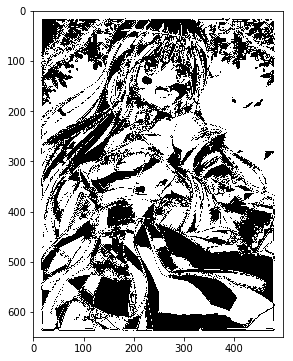

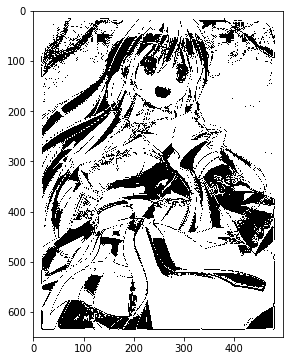

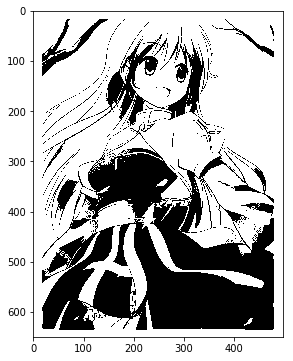

In [73]:
slicing = []
for i in range(8):
    plt.figure(figsize=(8,6))
    simg = (img & 2**i) >>i
    slicing.append(simg)
    plt.imshow(simg, cmap='gray')
    plt.show()

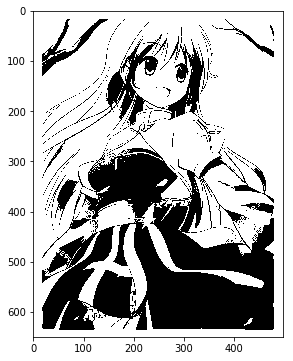

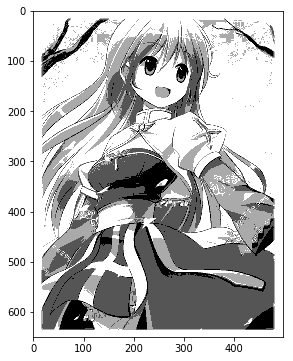

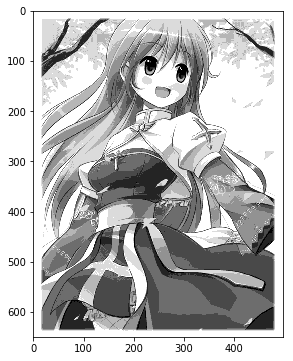

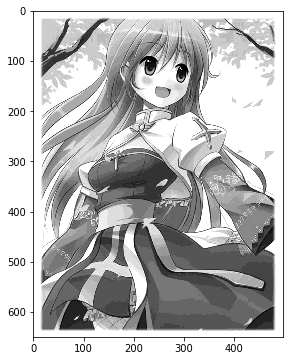

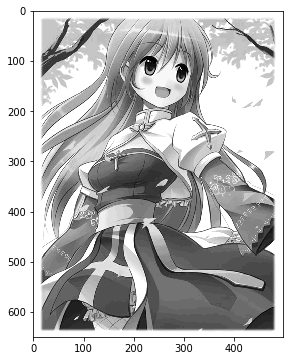

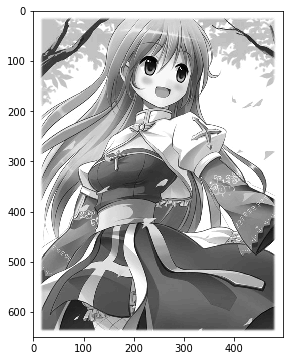

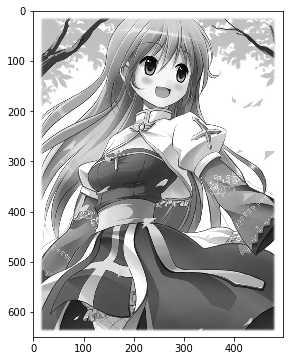

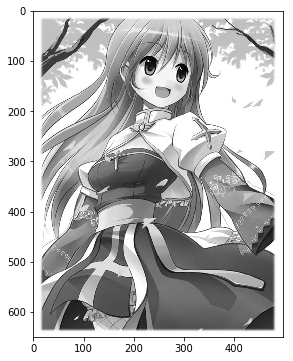

In [74]:
simg = np.zeros_like(slicing[0])
for i in range(8):
    simg = (simg<<1) + slicing.pop()
    plt.figure(figsize=(8,6))
    plt.imshow(simg, cmap='gray')
    plt.show()